In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=1000, shuffle=True)

In [3]:
import torch.nn as nn

net = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 16),
        nn.ReLU(),
        nn.Linear(16, 10))

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [5]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        loss = criterion(net(inputs), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if (i + 1) % 300 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 300))
            running_loss = 0.0

print('Finished Training')

[1,   300] loss: 1.173
[1,   600] loss: 0.471
[1,   900] loss: 0.397
[2,   300] loss: 0.342
[2,   600] loss: 0.326
[2,   900] loss: 0.318
[3,   300] loss: 0.298
[3,   600] loss: 0.297
[3,   900] loss: 0.282
[4,   300] loss: 0.275
[4,   600] loss: 0.272
[4,   900] loss: 0.267
[5,   300] loss: 0.259
[5,   600] loss: 0.256
[5,   900] loss: 0.249
[6,   300] loss: 0.242
[6,   600] loss: 0.242
[6,   900] loss: 0.243
[7,   300] loss: 0.237
[7,   600] loss: 0.224
[7,   900] loss: 0.233
[8,   300] loss: 0.215
[8,   600] loss: 0.231
[8,   900] loss: 0.222
[9,   300] loss: 0.215
[9,   600] loss: 0.210
[9,   900] loss: 0.215
[10,   300] loss: 0.210
[10,   600] loss: 0.208
[10,   900] loss: 0.198
Finished Training


In [6]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 94 %


In [8]:
with torch.no_grad():
    for i, data in enumerate(testloader):
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        if i == 1: break

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-10-66fa013d3651>:1: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx = (predicted != labels).nonzero().numpy().flatten()


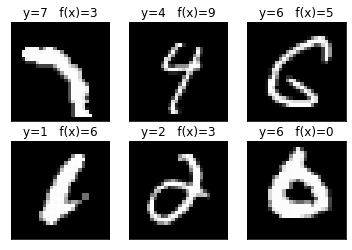

In [10]:
idx = (predicted != labels).nonzero().numpy().flatten()
np.random.shuffle(idx)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(np.squeeze(images[idx[i]]), cmap='gray')
    plt.title("y={}   f(x)={}".format(labels[idx[i]].item(), predicted[idx[i]].item()))
    plt.xticks([])
    plt.yticks([])

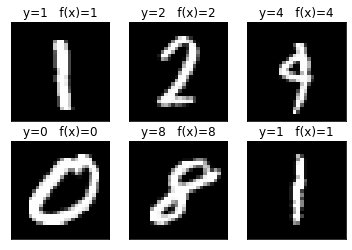

In [11]:
idx = np.random.randint(len(labels), size=6)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(np.squeeze(images[idx[i]]), cmap='gray')
    plt.title("y={}   f(x)={}".format(labels[idx[i]].item(), predicted[idx[i]].item()))
    plt.xticks([])
    plt.yticks([])